# Evaluación Final MOD3 - Mar Pastor
---

### Ejercicio EDA y Vizualización de datos

En este ejercicio usaremos datos que consisten en dos BBDD de tipo CSV que contienen datos que describen el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea.

Exploraremos los archivos:

- `Customer Flight Activity.csv` que contiene información sobre la actividad de vuelo de los clientes
- `Customer Loyalty History.csv` que proporciona un perfil detallado de los clientes y detalles sobre su membresía en el programa de lealtad
---

In [147]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# ------------------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [148]:
# abrimos los DataFrames:

df_flight = pd.read_csv('../data/Customer Flight Activity.csv')
df_loyalty = pd.read_csv('../data/Customer Loyalty History.csv')

### Trabajamos con el DataFrame de información sobre la actividad de vuelo de los clientes
#### DataFrame: `df_flight`
---

In [149]:
# 1. Exploramos una visión general de cada uno de los DataFrame:

display(df_flight.head(2)) # revisamos los primeros datos
print('---' * 50)
display(df_flight.tail(2)) # revisamos los últimos datos
print('---' * 50)
display(df_flight.sample(2)) # revisamos datos aleatorios

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


------------------------------------------------------------------------------------------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


------------------------------------------------------------------------------------------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
256370,342156,2018,3,12,5,17,3859,415.8,0,0
205311,235063,2018,1,3,0,3,1227,122.0,0,0


In [150]:
# exploramos el número de filas y columnas:
 
print(f"El número de filas es {df_flight.shape[0]}, el número de columnas es {df_flight.shape[1]}")

El número de filas es 405624, el número de columnas es 10


In [151]:
# exploramos los nombres de las columnas:

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [152]:
# 2. Exploramos la información de las columnas:

df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


### Primeras conclusiones de la epxloración de datos del DataFrame:

- No existen datos nulos, por lo que no haremos ninguna modificación
- Las columnas tienen nombres unificados, por lo que haremos cambios
- La columna 'Points Accumulated' tiene un tipo de dato 'float' y luego de la exploración inicial podríamos unificar los datos y cambiarlo a 'entero'
- La columna 'Year' la convertimos en object para tratarla como una columna categórica

In [153]:
# convertir dato 'float' a 'int' en la columna 'Points Accumulated'

df_flight['Points Accumulated'] = df_flight['Points Accumulated'].astype(int)

df_flight.info() # para comprobar el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Loyalty Number               405624 non-null  int64
 1   Year                         405624 non-null  int64
 2   Month                        405624 non-null  int64
 3   Flights Booked               405624 non-null  int64
 4   Flights with Companions      405624 non-null  int64
 5   Total Flights                405624 non-null  int64
 6   Distance                     405624 non-null  int64
 7   Points Accumulated           405624 non-null  int32
 8   Points Redeemed              405624 non-null  int64
 9   Dollar Cost Points Redeemed  405624 non-null  int64
dtypes: int32(1), int64(9)
memory usage: 29.4 MB


In [154]:
# convertir dato 'int' a 'object' en la columna 'Year'

df_flight['Year'] = df_flight['Year'].astype('object')

df_flight.info() # para verificar el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Loyalty Number               405624 non-null  int64 
 1   Year                         405624 non-null  object
 2   Month                        405624 non-null  int64 
 3   Flights Booked               405624 non-null  int64 
 4   Flights with Companions      405624 non-null  int64 
 5   Total Flights                405624 non-null  int64 
 6   Distance                     405624 non-null  int64 
 7   Points Accumulated           405624 non-null  int32 
 8   Points Redeemed              405624 non-null  int64 
 9   Dollar Cost Points Redeemed  405624 non-null  int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 29.4+ MB


In [155]:
# convertir dato 'int' a 'object' en la columna 'Month'

df_flight['Month'] = df_flight['Month'].astype('str')

df_flight.info() # para verificar el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Loyalty Number               405624 non-null  int64 
 1   Year                         405624 non-null  object
 2   Month                        405624 non-null  object
 3   Flights Booked               405624 non-null  int64 
 4   Flights with Companions      405624 non-null  int64 
 5   Total Flights                405624 non-null  int64 
 6   Distance                     405624 non-null  int64 
 7   Points Accumulated           405624 non-null  int32 
 8   Points Redeemed              405624 non-null  int64 
 9   Dollar Cost Points Redeemed  405624 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 29.4+ MB


In [156]:
# convertimos los numeros de los meses por los nombre de los meses para mejor comprensión
# usamos una diccionario-mascara que asigna a cada numero un nombre de mes, que luego aplicamos con un replace

mapa_mes = {'1': 'Enero', '2': 'Febrero', '3': 'Marzo', '4': 'Abril', '5': 'Mayo', '6': 'Junio', 
            '7': 'Julio', '8': 'Agosto', '9': 'Septiembre', '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'}

df_flight['Month'] = df_flight['Month'].map(mapa_mes) # usamos 'map' porque verificamos que no tenemos valores nulos en esta columna
df_flight['Month'].unique() # para verificar los cambios

array(['Enero', 'Septiembre', 'Febrero', 'Marzo', 'Noviembre', 'Abril',
       'Mayo', 'Julio', 'Junio', 'Agosto', 'Octubre', 'Diciembre'],
      dtype=object)

In [157]:
# 3. Exploramos los datos de las columnas categóricas usando 'describe()'

df_flight.describe(include='O').T

,count,unique,top,freq
Year,405624,2,2017,202812
Month,405624,12,Enero,33802


In [158]:
# exploramos los datos de las columnas numéricas usando describe()

df_flight.describe().T

# concluímos que las media y la mediana no están cercanas en muchos de los datos de algunas columnas, 
# y en algunas columnas la dispersión de los datos es alta

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.0,550834.0,772194.0,999986.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,1.0,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.0,1.0,10.0,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.0,488.0,2336.0,6293.0
Points Accumulated,405624.0,123.667002,146.579083,0.0,0.0,50.0,239.0,676.0
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.0,71.0


In [159]:
# 4. Exploramos el DataFrame para detectar registros duplicados

df_flight.duplicated().sum() 
# se registran 1864 entradas de datos duplicadas

1864

In [160]:
df_flight.isnull().sum() 
# podemos ver que los registros duplicados tiene valores '0' en cada una de las columnas

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [161]:
mascara = df_flight.duplicated(keep=False) # mantenemos visible las entradas originales y las duplicadas
df_flight[mascara].sort_values('Loyalty Number') # aplicamos la mascara para la columna de los id de los clientes que deben ser unicos

# comprobamos que los clientes se repiten en los registros en diferentes meses y sin ningun otro dato registrado

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,Enero,0,0,0,0,0,0,0
33843,101902,2017,Marzo,0,0,0,0,0,0,0
16942,101902,2017,Febrero,0,0,0,0,0,0,0
185952,101902,2017,Diciembre,0,0,0,0,0,0,0
185953,101902,2017,Diciembre,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
354784,992168,2018,Septiembre,0,0,0,0,0,0,0
33665,992168,2017,Febrero,0,0,0,0,0,0,0
33664,992168,2017,Febrero,0,0,0,0,0,0,0
101269,992168,2017,Junio,0,0,0,0,0,0,0


In [162]:
# se crea una nueva variable con la mascara creada
mascara = df_flight.duplicated(keep=False)
duplicados = df_flight[mascara]

# se agrupa por 'Loyalty Number' y contamos cuántas veces aparece cada uno para explorar a profundidad
conteo_por_cliente = duplicados.groupby('Loyalty Number').size().reset_index(name='Cantidad Duplicados') # nueva columna

# se ordena por los que tienen más duplicados primero
conteo_por_cliente = conteo_por_cliente.sort_values(by='Cantidad Duplicados', ascending=False)
conteo_por_cliente

,Loyalty Number,Cantidad Duplicados
94,678205,52
60,467894,48
64,488224,48
114,762990,48
110,741848,48
...,...,...
67,499874,2
104,713132,2
1,106001,2
70,512296,2


In [ ]:
# luego de visualizar todas las entradas duplicadas, se decide eliminar estos datos para que no nos afecte los siguientes análisis

# NOTA: Primero se verificó que habían muchas entradas con valores '0', lo que nos afectaba las visualizaciones de los datos
# Siguiendo este razonamiento se decide explorar los datos duplicados primero y luego de verificar que son clientes repetidos 
# múltiple veces y sin ningún registro en las demás columnas, se decide eliminar estos registros para que no afecten los siguientes análisis

# NOTA 2: Se le podría sugerir a la empresa que recoge los datos revisar el sistema de registro de clientes para no generar diferentes entradas
# para un mismo cliente, o generar alguna alerta cuando se intente registrar un cliente que ya existe en la base de datos

In [ ]:
# se eliminan los datos duplicados 
df_flight.drop_duplicates(inplace=True)
df_flight.duplicated().sum() # para verificar que no tenemos duplicados en el DataFrame

0

In [175]:
# verificamos el total de filas de DataFrame
df_flight.info()

# el DataFram contenia originalmente 405.624 entradas, al elimnar los duplicados las entradas total quedan en 403.760
# 405.624 - 403.760 = 1.864 (datos duplicados detectados anteriormente)

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Loyalty Number               403760 non-null  int64 
 1   Year                         403760 non-null  object
 2   Month                        403760 non-null  object
 3   Flights Booked               403760 non-null  int64 
 4   Flights with Companions      403760 non-null  int64 
 5   Total Flights                403760 non-null  int64 
 6   Distance                     403760 non-null  int64 
 7   Points Accumulated           403760 non-null  int32 
 8   Points Redeemed              403760 non-null  int64 
 9   Dollar Cost Points Redeemed  403760 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 32.3+ MB


In [163]:
# 4. Análisis la variable categóricas, usando un 'value_count'

for col in df_flight.select_dtypes(include='O').columns:
    print(f"Columna --> {col}")
    print(f"{df_flight[col].value_counts()}")
    print('***' * 25)

# los años 2017 y 2018 aparecen la misma cantidad de veces en la columna 'Year'
# todos los meses tienen la misma cantidad de entradas

Columna --> Year
Year
2017    202812
2018    202812
Name: count, dtype: int64
***************************************************************************
Columna --> Month
Month
Enero         33802
Septiembre    33802
Febrero       33802
Marzo         33802
Noviembre     33802
Abril         33802
Mayo          33802
Julio         33802
Junio         33802
Agosto        33802
Octubre       33802
Diciembre     33802
Name: count, dtype: int64
***************************************************************************


In [164]:
# 5. Análisis de la variable numéricas, usando histograma y boxplot
# seleccionamos las columnas que nos interesan

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

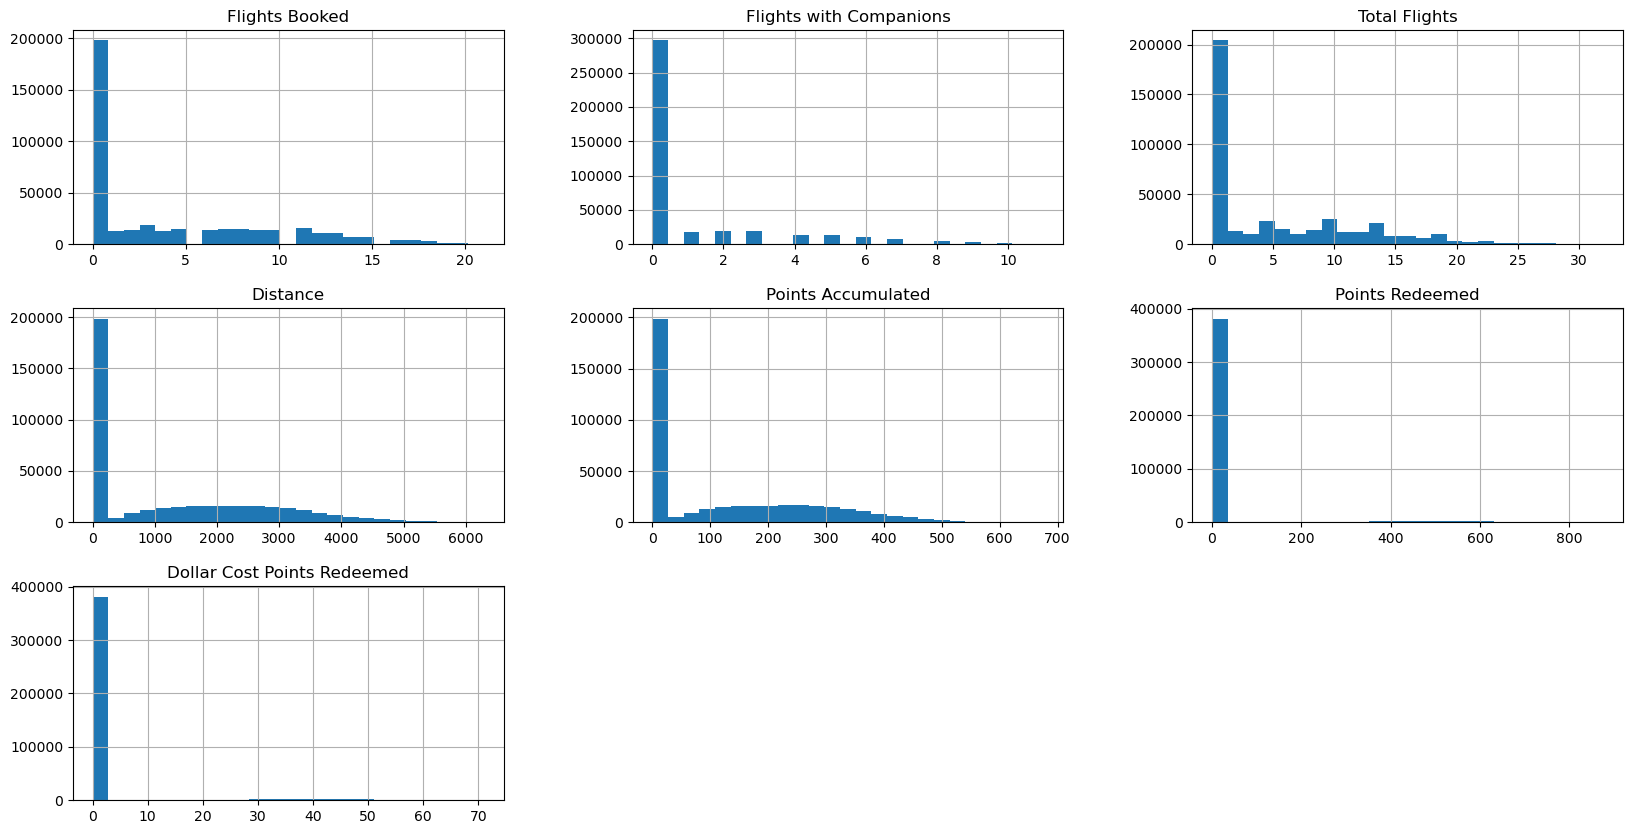

In [165]:
df_flight[['Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']].hist(bins=25, figsize=(20,10));

In [166]:
# en las gráficas anteriores vemos que los valores '0' nos distorcionan los datos, 
# ya que hay una gran cantidad de clientes en nuestra base de datos que no han registrado ningún vuelo aún

df_flight.head(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,Enero,3,0,3,1521,152,0,0
1,100102,2017,Enero,10,4,14,2030,203,0,0
2,100140,2017,Enero,6,0,6,1200,120,0,0
3,100214,2017,Enero,0,0,0,0,0,0,0
4,100272,2017,Enero,0,0,0,0,0,0,0
5,100301,2017,Enero,0,0,0,0,0,0,0
6,100364,2017,Enero,0,0,0,0,0,0,0
7,100380,2017,Enero,0,0,0,0,0,0,0
8,100428,2017,Enero,6,0,6,606,60,0,0
9,100504,2017,Enero,0,0,0,0,0,0,0


In [167]:
# creamos un DataFrame que filtre los clientes activos para analizar mejor su actividad. 
# Lo filtramos por 'Total Flights'ya que si no hay valores en esta columna, vemos que no se registran datos en las demás columnas

df_flight_active = df_flight[df_flight['Total Flights'] > 0]
df_flight_active.head(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,Enero,3,0,3,1521,152,0,0
1,100102,2017,Enero,10,4,14,2030,203,0,0
2,100140,2017,Enero,6,0,6,1200,120,0,0
8,100428,2017,Enero,6,0,6,606,60,0,0
10,100550,2017,Enero,3,0,3,2037,203,0,0
11,863070,2017,Septiembre,8,7,15,4245,424,341,28
16,100727,2017,Enero,11,0,11,1144,114,0,0
18,100753,2017,Enero,8,4,12,3264,326,0,0
19,100816,2017,Enero,9,1,10,2340,234,0,0
20,100853,2017,Enero,6,6,12,1236,123,0,0


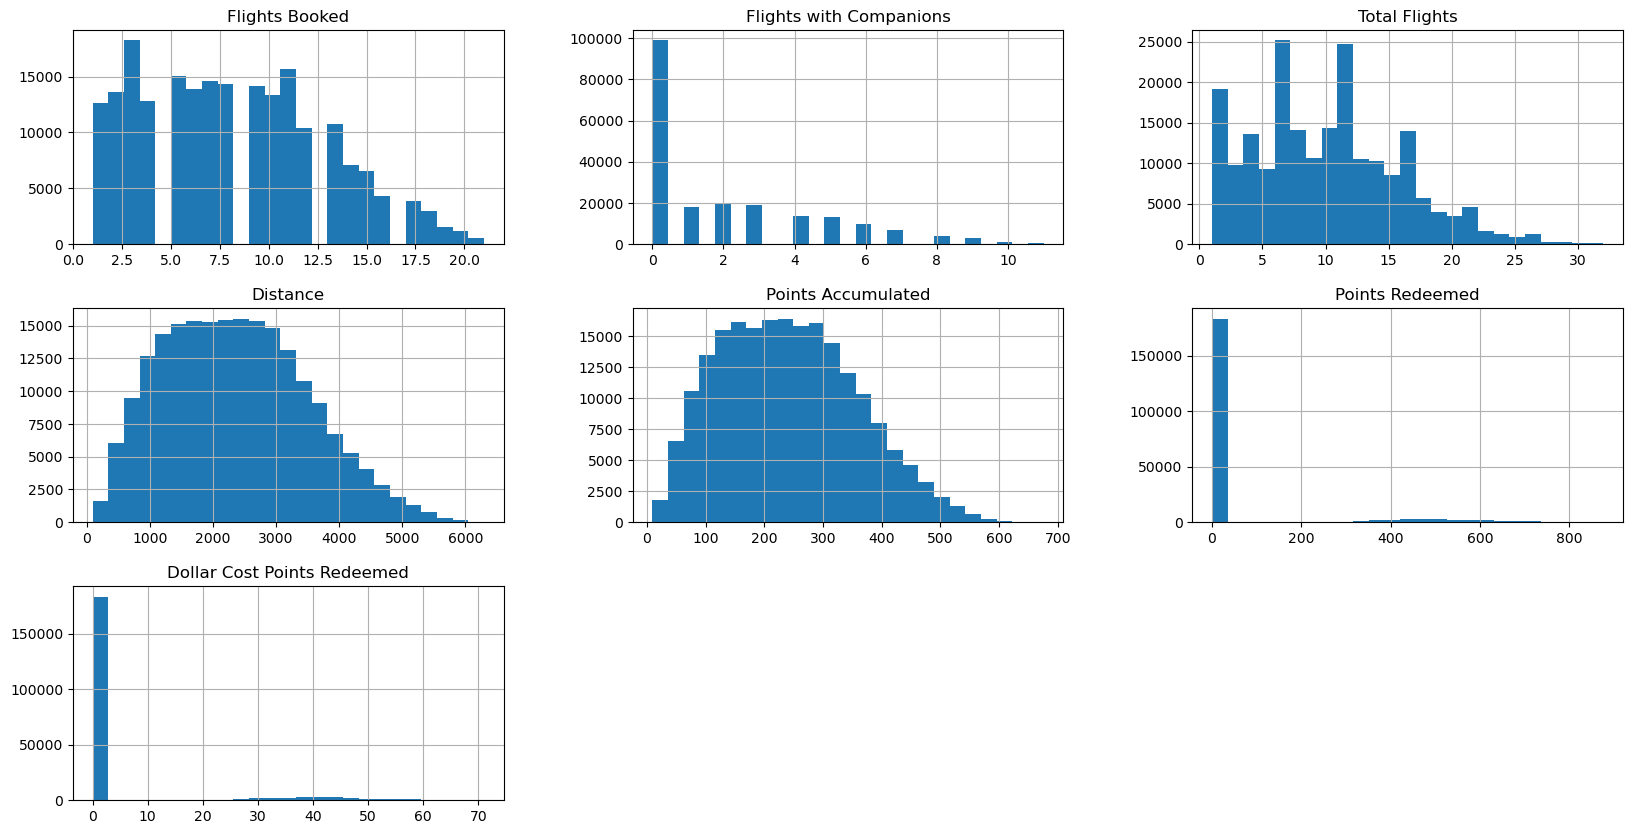

In [168]:
# con el DataFrame de clientes activos podemos visualizar mejor las gráficas:

df_flight_active[['Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']].hist(bins=25, figsize=(20,10));

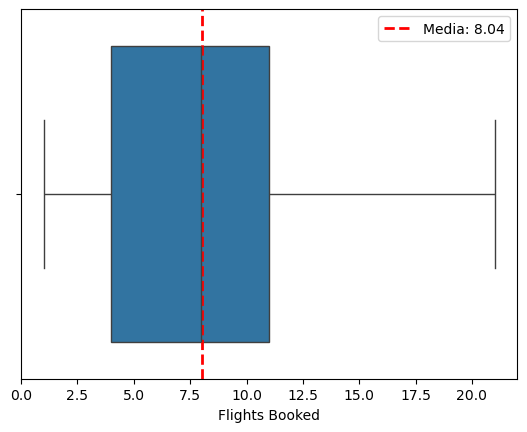

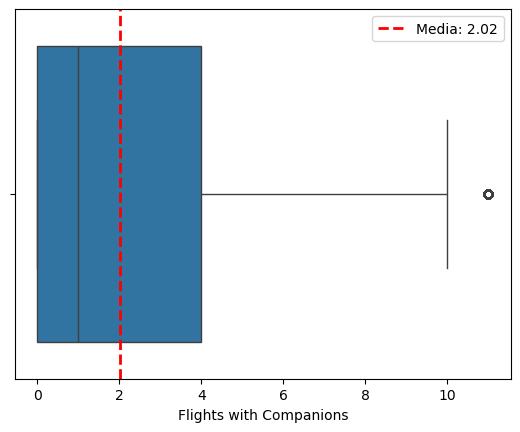

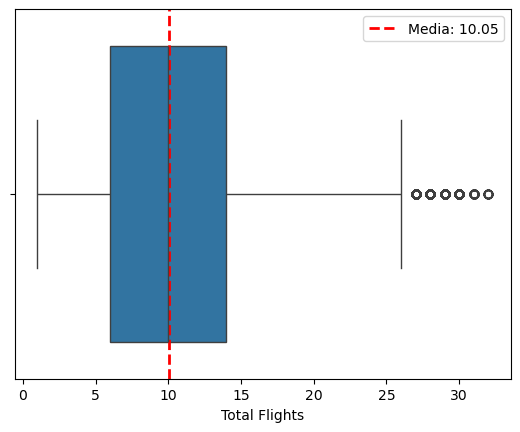

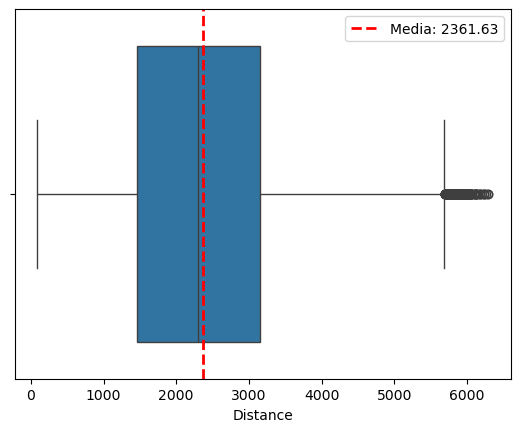

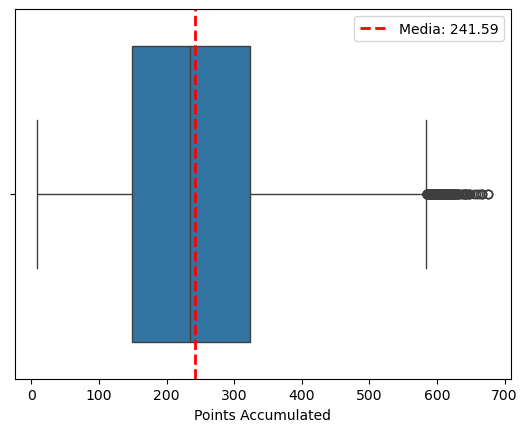

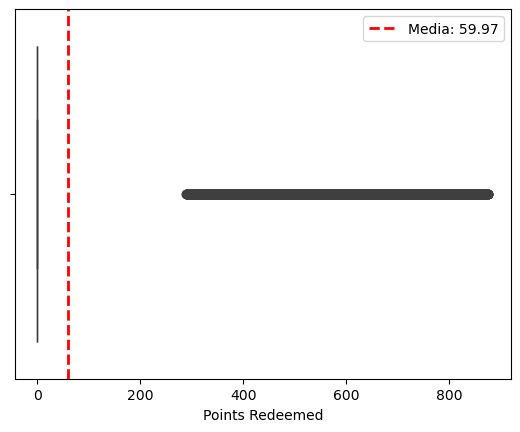

In [169]:
# usamos el DataFrame con los clientes filtrados (activos) y las columnas que nos aportan información:

for col in df_flight_active[['Flights Booked', 
                      'Flights with Companions', 
                      'Total Flights', 
                      'Distance',
                      'Points Accumulated',
                      'Points Redeemed']].columns:
    media_col = round(df_flight_active[col].mean(), 2) # incorporar la media en el gráfico
    sns.boxplot(data=df_flight_active, x=col)
    plt.axvline(x=media_col, color='red', linestyle='--', linewidth=2, label=f'Media: {media_col}')
    plt.legend()
    plt.show()

### Algunas conclusiones:

- Vemos que muchos clientes tienen entre 3 y 10 vuelos que han sido reservados, que corresponde un poco con la grafica de 'Total vuelos' (entre 5 y 10 vuelos totales)
- La media de vuelos reservados es de 8 vuelos reservados por cliente, y vuelos totales 10. Se podría decir que la mayoría de vuelos reservados se realizan
- Menos clientes han realizado mas de 20 vuelos
- En su mayoría los vuelos han sido sin acompañantes (vuelos individuales)
- La gran parte de los vuelos son de distancias cortas: entre 1.500 y 3.000. Pocos clientes han realizado vuelos mas largos
- Los clientes acumulan puntos por vuelos, entre 100 y 300 puentos (que se puede corresponder a la distancia de vuelo)
- Se puede concluir que la gran mayoría no ha utilizado aun estos puntos acumulados por vuelos realizados, ya que la media de los puntos usados se encuentra en 500 (tomando en cuenta que la mayoría de clientes tiene entre 150 y 300 puntos actualmente, 240 de media)

In [172]:
# valores nulos 'Salary', 'Cancellation Year, 'Cancellation Month'
# cambio valores a int 'Salary', 'Cancellation Year, 'Cancellation Month'